In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics, preprocessing
import os

In [2]:
print(os.getcwd())

C:\Users\arsal\opencv\Scripts\OFSTED\notebooks


In [3]:
os.chdir('../data/processed')

In [4]:
combined_ofsted_df = pd.read_csv(os.getcwd() + '/ComponentOneData.csv')
combined_ofsted_df.shape

(6396, 36)

In [5]:
combined_ofsted_df = combined_ofsted_df.loc[(combined_ofsted_df['Rating'] != 'Unknown')]
# combined_ofsted_df.loc[(combined_ofsted_df['Rating'].str.startswith('Requires Improvement') == True) |
#                        (combined_ofsted_df['Rating'].str.startswith('Inadequate') == True) |
#                        (combined_ofsted_df['Rating'].str.startswith('Satisfactory') == True), 'Rating'] = 'Not Good'
# combined_ofsted_df['Rating'].unique()

In [6]:
combined_ofsted_df = combined_ofsted_df.loc[(combined_ofsted_df['RELCHAR'] != 'Missing')]
combined_ofsted_df.loc[(combined_ofsted_df['RELCHAR'].str.startswith('Islam') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Sunni Deobandi') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Muslim') == True), 'RELCHAR'] = 'Muslim'

combined_ofsted_df.loc[(combined_ofsted_df['RELCHAR'].str.startswith('Roman Catholic') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Church of England') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Christian/Evangelical') == True) | 
                       (combined_ofsted_df['RELCHAR'].str.startswith('Church of England/Roman Catholic') == True) | 
                       (combined_ofsted_df['RELCHAR'].str.startswith('Roman Catholic/Church of England') == True) | 
                       (combined_ofsted_df['RELCHAR'].str.startswith('Anglican/Christian') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Church of England/Christian') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Church of England/Methodist') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Catholic') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Quaker') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Inter- / non- denominational') == True),'RELCHAR'] = 'Christian'

combined_ofsted_df.loc[(combined_ofsted_df['RELCHAR'].str.startswith('Charadi Jewish') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Orthodox Jewish') == True) |
                       (combined_ofsted_df['RELCHAR'].str.startswith('Greek Orthodox') == True), 'RELCHAR'] = 'Jewish'

combined_ofsted_df.loc[(combined_ofsted_df['RELCHAR'].str.startswith('Does not apply') == True) , 'RELCHAR'] = 'None'

In [7]:
combined_ofsted_df['RELCHAR'].unique()

array(['None', 'Christian', 'Jewish', 'Muslim', 'Sikh', 'Hindu',
       'Multi-faith'], dtype=object)

In [8]:
# df = combined_ofsted_df.loc[:,combined_ofsted_df.dtypes == object]

# df = combined_ofsted_df[['P8_BANDING','GENDER','ATT8SCR','P8MEA','Rating','Rating_LabEnc','RELCHAR','RELCHAR_LabEnc','PNUMFSM','PNORG','PNORB']]
df = combined_ofsted_df.copy()

for col in df.loc[:,df.dtypes == 'object'].drop(columns=['GENDER','RELCHAR','Rating']).columns:
    mean = round(df[col].transform(pd.to_numeric, errors='coerce').mean(),1)
    dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
    df[col] = df[col].replace(dictMean)
    df[col] = df[col].astype(float)

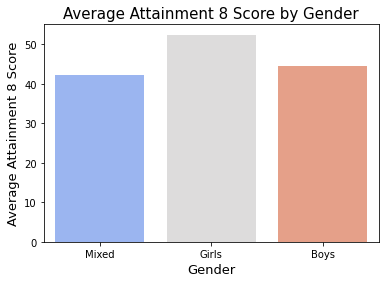

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=df['GENDER'],y=df['ATT8SCR'],data=df,ci=None,palette="coolwarm")
ax.set_ylabel('Average Attainment 8 Score',fontsize=13)
ax.set_xlabel('Gender',fontsize=13)
ax.set_title('Average Attainment 8 Score by Gender',fontsize=15)
plt.savefig("Figure4.png", bbox_inches = "tight")

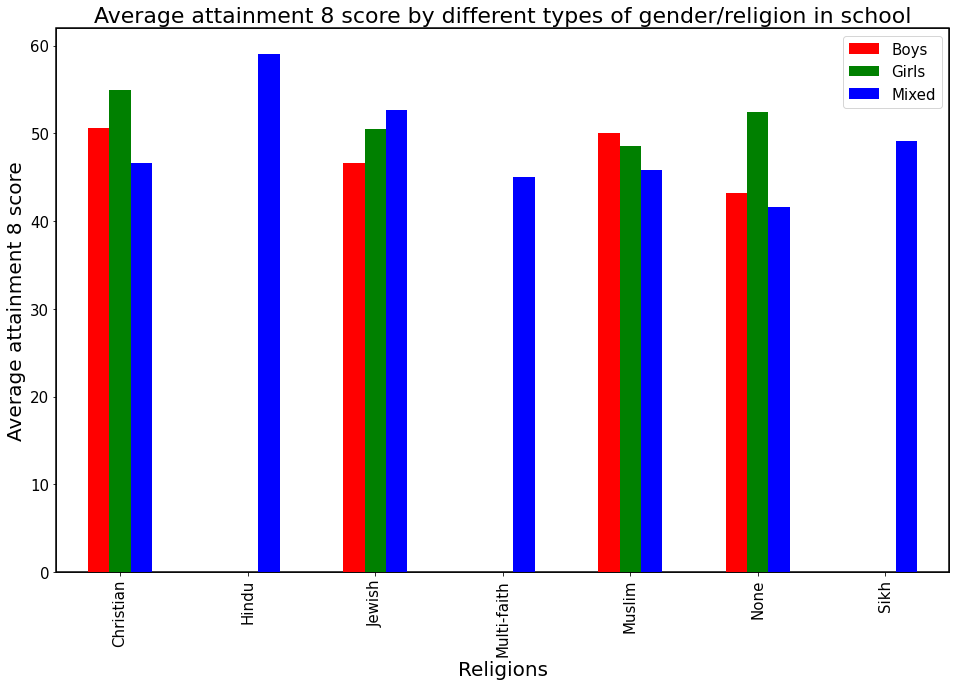

In [10]:
df1 = df.groupby(['RELCHAR','GENDER'])['ATT8SCR'].mean().unstack('GENDER')

ax = df1.plot(kind='bar', figsize=(16,10), fontsize=15,color='rgb');
ax.set_alpha(1)
ax.set_ylabel("Average attainment 8 score", fontsize=20);
ax.set_xlabel("Religions", fontsize=20);
ax.set_title('Average attainment 8 score by different types of gender/religion in school', fontsize=22)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.legend(fontsize=15)
plt.savefig("Figure3.png", bbox_inches = "tight")
plt.show()

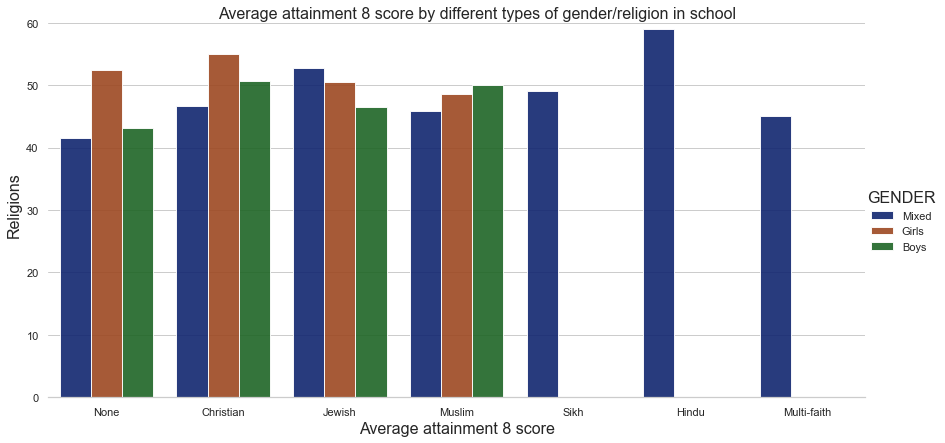

In [11]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="RELCHAR", y="ATT8SCR", hue="GENDER",
    ci=None, palette="dark", alpha=.9, height=6,aspect=12/6
)
g.despine(left=True)
# g.set_axis_labels("Region","Average attainment 8 score")
g.fig.suptitle('Average attainment 8 score by different types of gender/religion in school',fontsize=16) 
g.set_xlabels("Average attainment 8 score",fontsize=16)
g.set_ylabels("Religions",fontsize=16)
plt.setp(g._legend.get_title(), fontsize=16)
g.savefig("Figure9.png")

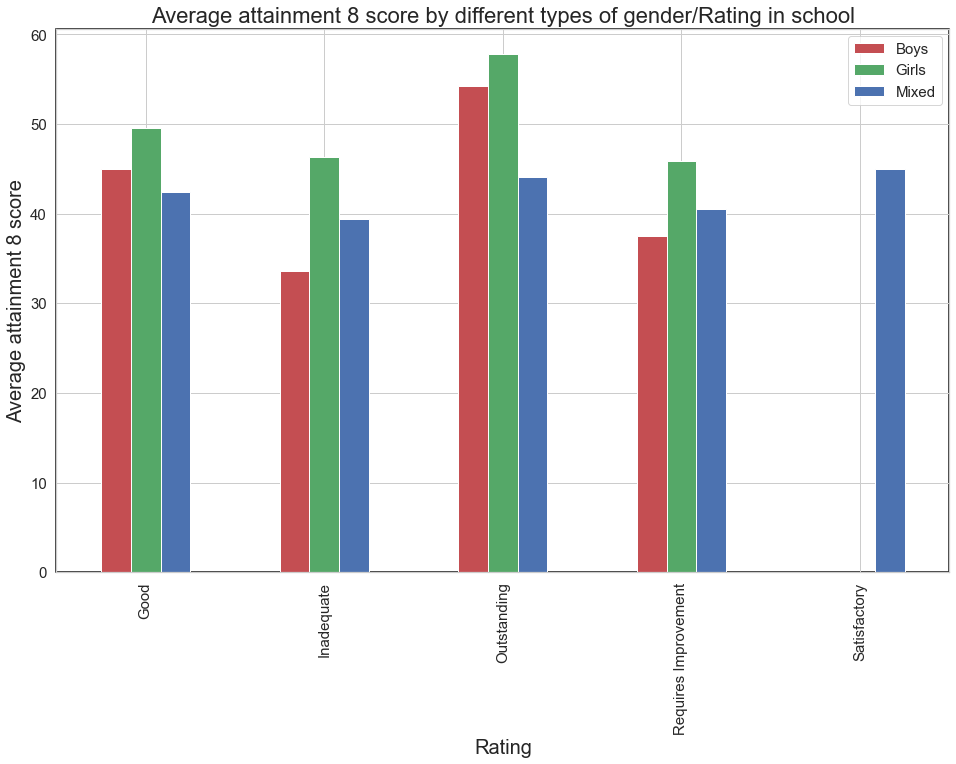

In [12]:
df1 = df.groupby(['Rating','GENDER'])['ATT8SCR'].mean().unstack('GENDER')

ax = df1.plot(kind='bar', figsize=(16,10), fontsize=15,color='rgb');
ax.set_alpha(1)
ax.set_ylabel("Average attainment 8 score", fontsize=20);
ax.set_xlabel("Rating", fontsize=20);
ax.set_title('Average attainment 8 score by different types of gender/Rating in school', fontsize=22)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.legend(fontsize=15)
plt.savefig("Figure6.png", bbox_inches = "tight")
plt.show()

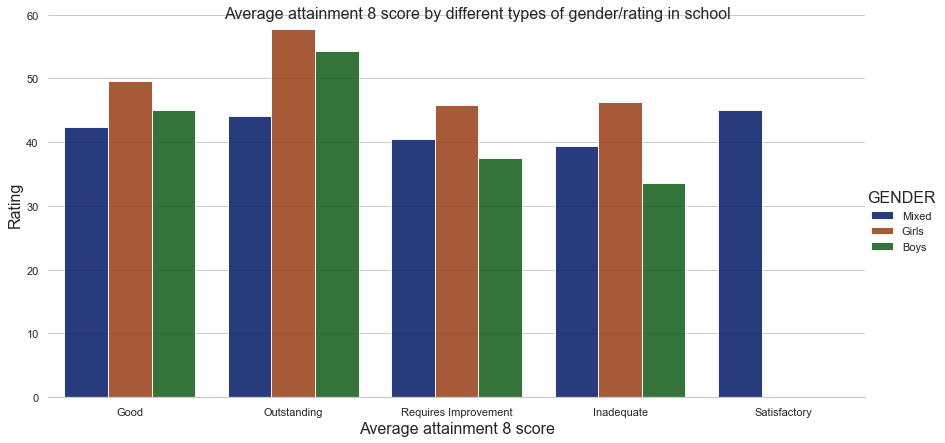

In [13]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="Rating", y="ATT8SCR", hue="GENDER",
    ci=None, palette="dark", alpha=.9, height=6,aspect=12/6
)
g.despine(left=True)
# g.set_axis_labels("Region","Average attainment 8 score")
g.fig.suptitle('Average attainment 8 score by different types of gender/rating in school',fontsize=16) 
g.set_xlabels("Average attainment 8 score",fontsize=16)
g.set_ylabels("Rating",fontsize=16)
plt.setp(g._legend.get_title(), fontsize=16)
g.savefig("Figure8.png")

In [14]:
# # df[['PNORG','PNORB']].describe()
# girls_sum = df['PNORG'].sum()
# boys_sum = df['PNORB'].sum()

# perc1 = boys_sum / (girls_sum + boys_sum) * 100
# perc2 = girls_sum / (girls_sum + boys_sum) * 100
# print(perc1)

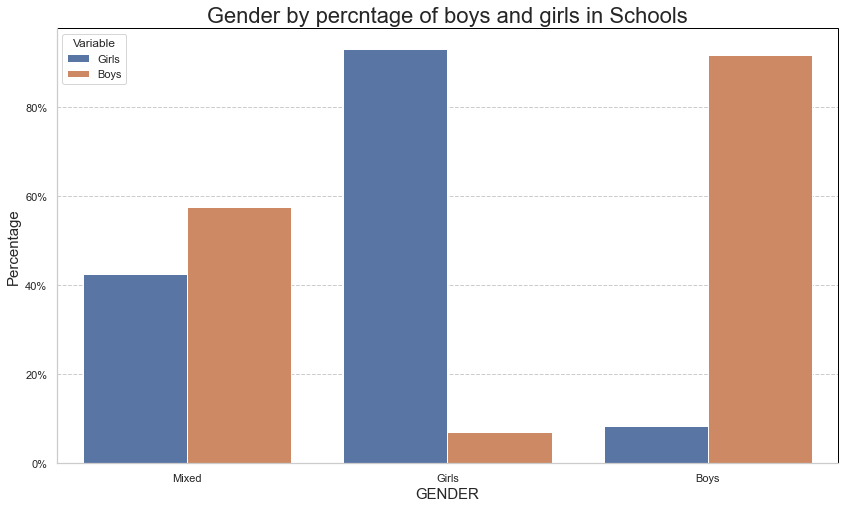

In [15]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'Girls': df['PNORG'].tolist(),
    'Boys': df['PNORB'].tolist(),
})
fig, ax1 = plt.subplots(figsize=(14, 8))
data = df1.melt(id_vars='GENDER').rename(columns=str.title)
sns.barplot(x='Gender', y='Value', hue='Variable', data=data, ax=ax1,ci=None)
sns.despine(fig)
ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('GENDER',fontsize=15)
ax1.set_title('Gender by percntage of boys and girls in Schools',fontsize=22)
ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1') 
tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax1.yaxis.set_major_formatter(tick)
plt.savefig("Figure13.png")

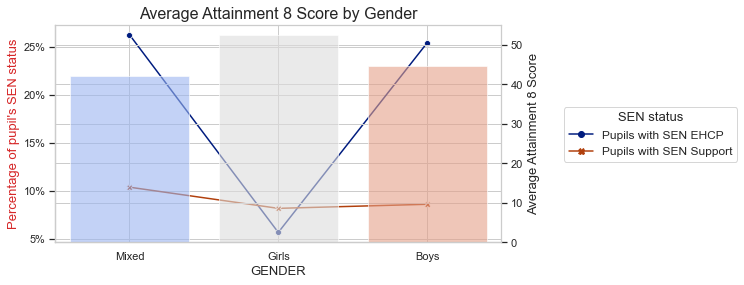

In [16]:
sns.set_style("whitegrid")
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'Pupils with SEN EHCP': df['PSENELSE'].tolist(),
    'Pupils with SEN Support': df['PSENELK'].tolist(),
})
fig, ax1 = plt.subplots(figsize=(8, 4))
data = df1.melt(id_vars='GENDER').rename(columns=str.title)
sns.lineplot(x='Gender', y='Value', hue='Variable', data=data, ax=ax1,ci=None,palette='dark',style='Variable',
    markers=True, dashes=False)
sns.despine(fig)

color = 'tab:red'
ax1.set_ylabel('Percentage of pupil\'s SEN status',fontsize=13,color=color)
ax1.set_xlabel('GENDER',fontsize=13)
ax1.set_title('Average Attainment 8 Score by Gender',fontsize=16)

ax1.legend(bbox_to_anchor=(1.32,0.5), loc="center right",  
           bbox_transform=fig.transFigure,title="SEN status",title_fontsize=13,fontsize=12, fancybox=True)

ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1') 

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax1.yaxis.set_major_formatter(tick)


ax2 = ax1.twinx()
ax2 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df, alpha=.6,palette='coolwarm')                   
ax2.set_ylabel('Average Attainment 8 Score', fontsize=13)
ax2.tick_params(axis='y')
plt.show()
fig.savefig("Figure14.png",bbox_inches = "tight")

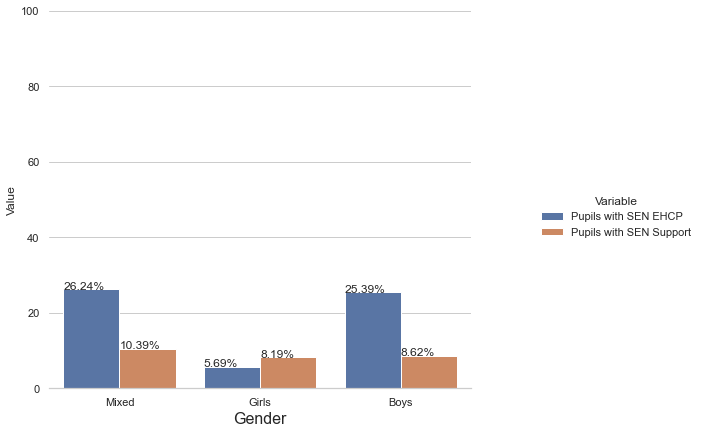

In [17]:
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'Pupils with SEN EHCP': df['PSENELSE'].tolist(),
    'Pupils with SEN Support': df['PSENELK'].tolist(),
})
data = df1.melt(id_vars='GENDER').rename(columns=str.title)

# fig, ax = plt.subplots(figsize=(10, 6))
g = sns.catplot(x='Gender',y='Value', hue='Variable',kind='bar',ci=None,data=data)
g.fig.set_size_inches(10,6)
g.despine(left=True)
# g.set_axis_labels("Region","Average attainment 8 score")
# g.fig.suptitle('Gender by Percentage of boys and girls in schools',fontsize=16) 
g.set_xlabels("Gender",fontsize=16)
# g.set_ylabels("Percentage of boys and girls in schools",fontsize=16)
# g._legend.set_title('Sex')
# plt.setp(g._legend.get_title(), fontsize=14)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# g.savefig("Figure18.png")

In [18]:
combined_ofsted_df.loc[combined_ofsted_df['URN']==134646][['PSENELSE','PSENELK']]

,PSENELSE,PSENELK
2598,1.7,9.5


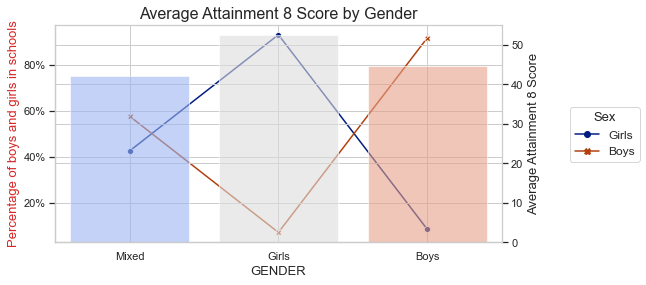

In [19]:
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'Girls': df['PNORG'].tolist(),
    'Boys': df['PNORB'].tolist(),
})
data = df1.melt(id_vars='GENDER').rename(columns=str.title)

fig, ax1 = plt.subplots(figsize=(8, 4))
sns.lineplot(x='Gender', y='Value', hue='Variable', data=data, ax=ax1,ci=None,palette='dark',style='Variable',
    markers=True, dashes=False)
sns.despine(fig)
color = 'tab:red'
ax1.set_ylabel('Percentage of boys and girls in schools',fontsize=13,color=color)
ax1.set_xlabel('GENDER',fontsize=13)
ax1.set_title('Average Attainment 8 Score by Gender',fontsize=16)

ax1.legend(bbox_to_anchor=(1.15,0.5), loc="center right",  
           bbox_transform=fig.transFigure,title="Sex",title_fontsize=13,fontsize=12, fancybox=True)

ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1') 

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax1.yaxis.set_major_formatter(tick)

ax2 = ax1.twinx()
ax2 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df, alpha=.6,palette='coolwarm')                   
ax2.set_ylabel('Average Attainment 8 Score', fontsize=13)
ax2.tick_params(axis='y')
plt.show()
fig.savefig("Figure15.png",bbox_inches = "tight")

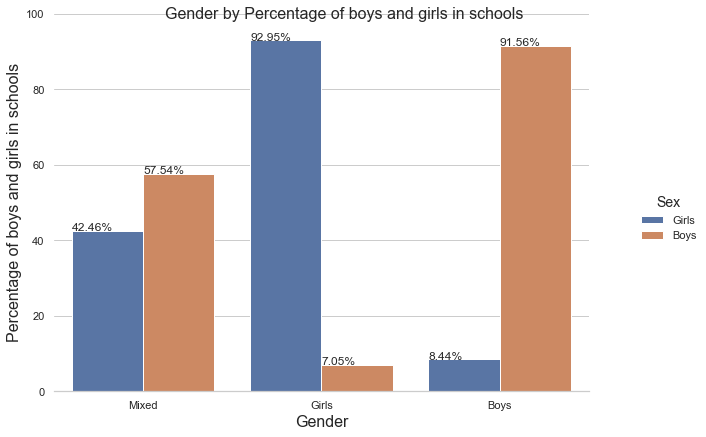

In [20]:
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'Girls': df['PNORG'].tolist(),
    'Boys': df['PNORB'].tolist(),
})
data = df1.melt(id_vars='GENDER').rename(columns=str.title)

# fig, ax = plt.subplots(figsize=(10, 6))
g = sns.catplot(x='Gender',y='Value', hue='Variable',kind='bar',ci=None,data=data)
g.fig.set_size_inches(10,6)
g.despine(left=True)
# g.set_axis_labels("Region","Average attainment 8 score")
g.fig.suptitle('Gender by Percentage of boys and girls in schools',fontsize=16) 
g.set_xlabels("Gender",fontsize=16)
g.set_ylabels("Percentage of boys and girls in schools",fontsize=16)
g._legend.set_title('Sex')
plt.setp(g._legend.get_title(), fontsize=14)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.savefig("Figure18.png")

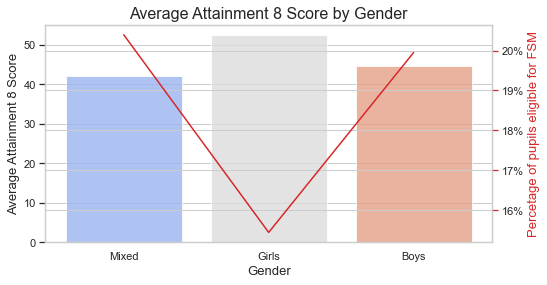

In [21]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df, palette='coolwarm',alpha=0.8)
ax1.set_title('Average Attainment 8 Score by Gender', fontsize=16)
ax1.set_xlabel('Gender', fontsize=13)
ax1.set_ylabel('Average Attainment 8 Score', fontsize=13)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x=df['GENDER'], y=df['PNUMFSM']*100,ci=None, data = df, color=color)
ax2.set_ylabel('Percetage of pupils eligible for FSM', fontsize=13, color=color)

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax2.yaxis.set_major_formatter(tick)

ax2.tick_params(axis='y', color=color)
plt.show()
fig.savefig("Figure8.png", bbox_inches = "tight")

<AxesSubplot:xlabel='GENDER', ylabel='PNUMFSM'>

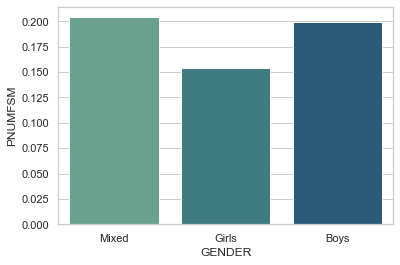

In [22]:
sns.barplot(x=df['GENDER'], y=df['PNUMFSM'],ci=None, data = combined_ofsted_df, palette='crest')

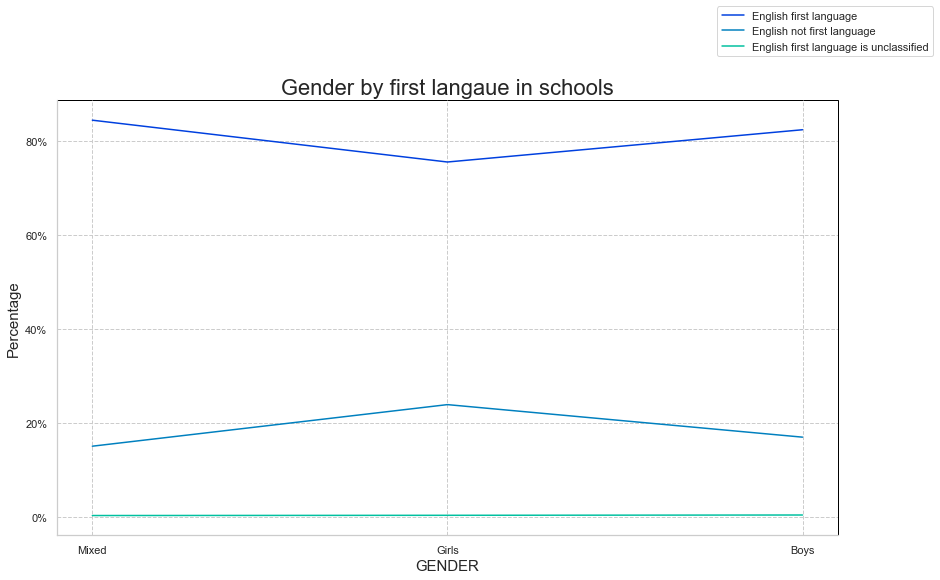

In [23]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'English first language': df['PNUMENGFL'].tolist(),
    'English not first language': df['PNUMEAL'].tolist(),
    'English first language is unclassified': df['PNUMUNCFL'].tolist(),
})
data = df1.melt(id_vars='GENDER').rename(columns=str.title)

fig, ax1 = plt.subplots(figsize=(14, 8))
sns.lineplot(x='Gender', y='Value', hue='Variable', data=data, ax=ax1,ci=None,palette='winter')
sns.despine(fig)

ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('GENDER',fontsize=15)
ax1.set_title('Gender by first langaue in schools',fontsize=22)

ax1.legend(bbox_to_anchor=(1,1), loc="right",  bbox_transform=fig.transFigure)

ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1') 

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax1.yaxis.set_major_formatter(tick)

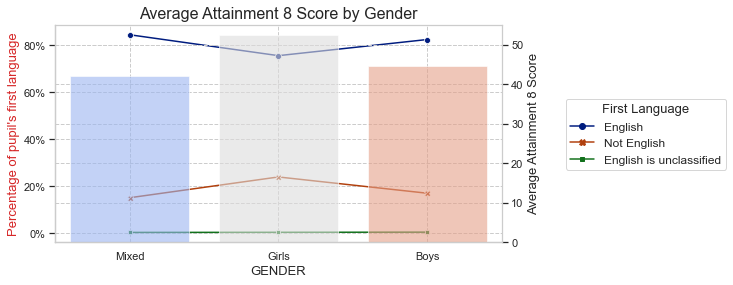

In [24]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'English': df['PNUMENGFL'].tolist(),
    'Not English': df['PNUMEAL'].tolist(),
    'English is unclassified': df['PNUMUNCFL'].tolist(),
})
data = df1.melt(id_vars='GENDER').rename(columns=str.title)

fig, ax1 = plt.subplots(figsize=(8, 4))
color = 'tab:red'
sns.lineplot(x='Gender', y='Value', hue='Variable', data=data, ax=ax1,ci=None,palette='dark',style='Variable',
    markers=True, dashes=False)
sns.despine(fig)

ax1.set_ylabel('Percentage of pupil\'s first language',fontsize=13,color=color)
ax1.set_xlabel('GENDER',fontsize=13)
ax1.set_title('Average Attainment 8 Score by Gender',fontsize=16)

ax1.legend(bbox_to_anchor=(1.3,0.5), loc="center right",  bbox_transform=fig.transFigure,title="First Language",title_fontsize=13,fontsize=12, fancybox=True)

ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1') 

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax1.yaxis.set_major_formatter(tick)


ax2 = ax1.twinx()
ax2 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df,alpha=.6,palette='coolwarm')
ax2.set_ylabel('Average Attainment 8 Score', fontsize=13)
ax2.tick_params(axis='y')
plt.show()
fig.savefig("Figure16.png", bbox_inches = "tight")

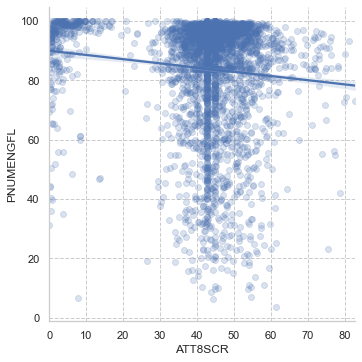

In [25]:
# df1 = pd.DataFrame({
#     'ATT8SCR': df['ATT8SCR'].tolist(),
#     'English': df['PNUMENGFL'].tolist(),
#     'Not English': df['PNUMEAL'].tolist(),
#     'English is unclassified': df['PNUMUNCFL'].tolist(),
# })

sns.lmplot(x='ATT8SCR', y='PNUMENGFL', data=df,scatter_kws={'alpha':0.2});

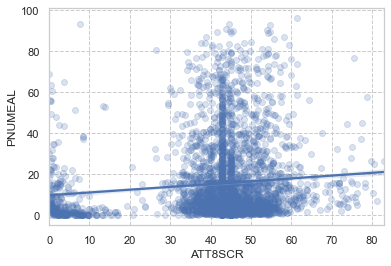

In [26]:
sns.regplot(x='ATT8SCR', y='PNUMEAL', data=df,scatter_kws={'alpha':0.2});

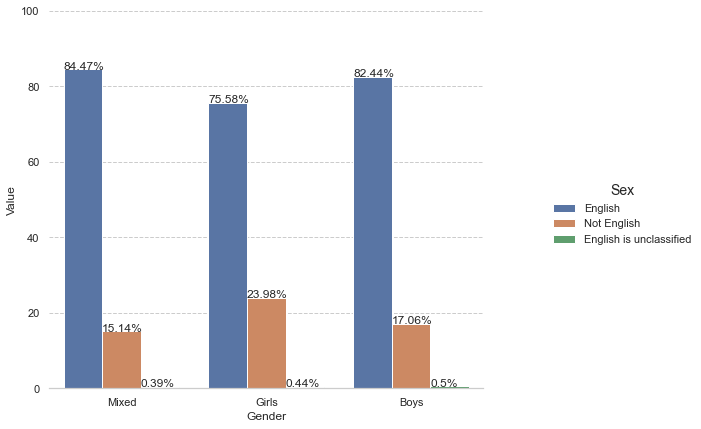

In [27]:
df1 = pd.DataFrame({
    'GENDER': df['GENDER'].tolist(),
    'English': df['PNUMENGFL'].tolist(),
    'Not English': df['PNUMEAL'].tolist(),
    'English is unclassified': df['PNUMUNCFL'].tolist(),
})
data = df1.melt(id_vars='GENDER').rename(columns=str.title)

# fig, ax = plt.subplots(figsize=(10, 6))
g = sns.catplot(x='Gender',y='Value', hue='Variable',kind='bar',ci=None,data=data)
g.fig.set_size_inches(10,6)
g.despine(left=True)
# g.set_axis_labels("Region","Average attainment 8 score")
# g.fig.suptitle('Gender by Percentage of boys and girls in schools',fontsize=16) 
# g.set_xlabels("Gender",fontsize=16)
# g.set_ylabels("Percentage of boys and girls in schools",fontsize=16)
g._legend.set_title('Sex')
plt.setp(g._legend.get_title(), fontsize=14)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# g.savefig("Figure18.png")

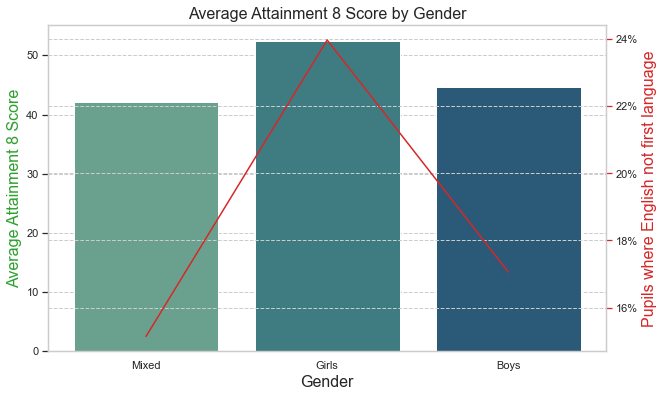

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df, palette='crest')
ax1.set_title('Average Attainment 8 Score by Gender', fontsize=16)
ax1.set_xlabel('Gender', fontsize=16)
ax1.set_ylabel('Average Attainment 8 Score', fontsize=16, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x=df['GENDER'], y=df['PNUMEAL'],ci=None, data = df, sort=False, color=color)
ax2.set_ylabel('Pupils where English not first language', fontsize=16, color=color)

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax2.yaxis.set_major_formatter(tick)

ax2.tick_params(axis='y', color=color)
plt.show()
fig.savefig("Figure9.png")

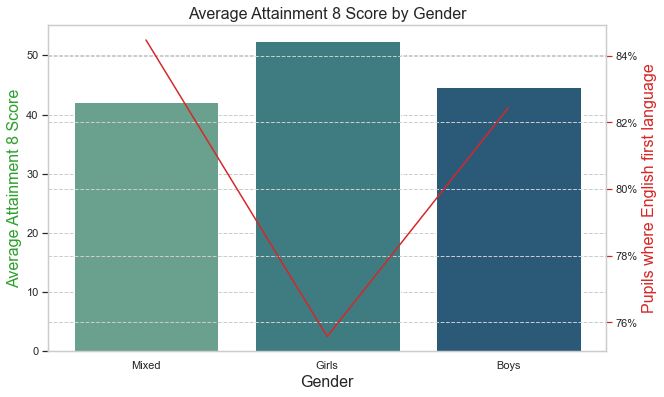

In [29]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df, palette='crest')
ax1.set_title('Average Attainment 8 Score by Gender', fontsize=16)
ax1.set_xlabel('Gender', fontsize=16)
ax1.set_ylabel('Average Attainment 8 Score', fontsize=16, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x=df['GENDER'], y=df['PNUMENGFL'],ci=None, data = df, sort=False, color=color)
ax2.set_ylabel('Pupils where English first language', fontsize=16, color=color)

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax2.yaxis.set_major_formatter(tick)

ax2.tick_params(axis='y', color=color)
plt.show()
fig.savefig("Figure10.png")

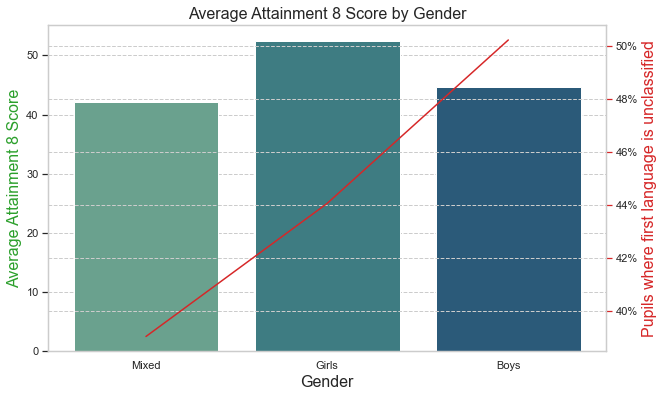

In [30]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1 = sns.barplot(x=df['GENDER'], y=df['ATT8SCR'],ci=None, data = df, palette='crest')
ax1.set_title('Average Attainment 8 Score by Gender', fontsize=16)
ax1.set_xlabel('Gender', fontsize=16)
ax1.set_ylabel('Average Attainment 8 Score', fontsize=16, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x=df['GENDER'], y=df['PNUMUNCFL']*100,ci=None, data = df, sort=False, color=color)
ax2.set_ylabel('Pupils where first language is unclassified', fontsize=16, color=color)

tick = mtick.StrMethodFormatter('{x:,.0f}%')
ax2.yaxis.set_major_formatter(tick)

ax2.tick_params(axis='y', color=color)
plt.show()
fig.savefig("Figure11.png")

In [31]:
dfLaAndP8 = combined_ofsted_df[['LA','P8MEA','ATT8SCR','GENDER']]

mean = round(dfLaAndP8['P8MEA'].transform(pd.to_numeric, errors='coerce').mean(),1)
dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
dfLaAndP8['P8MEA'] = dfLaAndP8['P8MEA'].replace(dictMean).astype(float)

mean = round(dfLaAndP8['ATT8SCR'].transform(pd.to_numeric, errors='coerce').mean(),1)
dictMean = {'NE': mean, 'SUPP': mean, 'NP': mean, 'LOWCOV': mean,'SP': mean}
dfLaAndP8['ATT8SCR'] = dfLaAndP8['ATT8SCR'].replace(dictMean).astype(float)

In [32]:
dfLACodes = pd.read_csv('la_and_region_codes_meta.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'la_and_region_codes_meta.csv'

In [ ]:
merge1_df = pd.merge(dfLaAndP8,dfLACodes, how='left', left_on='LA', right_on='LEA')
merge1_df['P8MEA'] = merge1_df['P8MEA'].fillna(merge1_df['P8MEA'].mean())
merge1_df['ATT8SCR'] = merge1_df['ATT8SCR'].fillna(merge1_df['ATT8SCR'].mean())

In [ ]:
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('London') == True,'REGION NAME'] = 'London'
merge1_df.loc[merge1_df['REGION NAME'].str.contains('Yorkshire') == True,'REGION NAME'] = 'Yorkshire'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('South West') == True,'REGION NAME'] = 'South West'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('South East') == True,'REGION NAME'] = 'South East'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('East of England') == True,'REGION NAME'] = 'East of England'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('North West') == True,'REGION NAME'] = 'North West'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('West Midlands') == True,'REGION NAME'] = 'West Midlands'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('North East') == True,'REGION NAME'] = 'North East'
merge1_df.loc[merge1_df['REGION NAME'].str.startswith('East Midlands') == True,'REGION NAME'] = 'East Midlands'

In [ ]:
merge1_df.head()

In [ ]:
df1 = merge1_df.groupby(['REGION NAME','GENDER'])['ATT8SCR'].mean().unstack('GENDER')

ax = df1.plot(kind='bar', figsize=(16,8), fontsize=15,color='rgb');
ax.set_alpha(1)
ax.set_ylabel("Average attainment 8 score", fontsize=20);
ax.set_xlabel("Region", fontsize=20);
ax.set_title('Average attainment 8 score by different types of gender/region in school', fontsize=22)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.legend(fontsize=15)
plt.savefig("Figure5.png", bbox_inches = "tight")
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=merge1_df, kind="bar",
    x="REGION NAME", y="ATT8SCR", hue="GENDER",
    ci=None, palette="dark", alpha=.9, height=6,aspect=12/6
)
g.despine(left=True)
# g.set_axis_labels("Region","Average attainment 8 score")
g.fig.suptitle('Average attainment 8 score by different types of gender/region in school',fontsize=16) 
g.set_xlabels("Average attainment 8 score",fontsize=16)
g.set_ylabels("Region",fontsize=16)
plt.setp(g._legend.get_title(), fontsize=16)
g.savefig("Figure7.png")